<a href="https://colab.research.google.com/github/annvorosh/GB/blob/Alg_AD/Alg_L1(gradient_descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [ ]:
X.shape

(2, 10)

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [ ]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

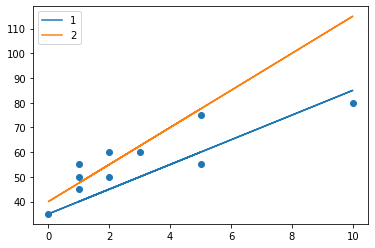

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [ ]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [ ]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [ ]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [ ]:
X.shape

(2, 10)

In [ ]:
X.T.shape

(10, 2)

In [ ]:
all(X @ y == np.dot(X,y))

True

In [ ]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [ ]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

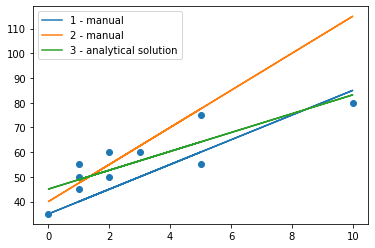

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [ ]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [ ]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [ ]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [ ]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

Градиентный спуск

In [ ]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [ ]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [ ]:
n = X.shape[1]

for a in range(10):
  print(f'\na = {a}:\n')
  alpha = a * 0.01
  W = np.array([1, 0.5])
  print(f'Number of objects = {n} \
         \nLearning rate = {alpha} \
         \nInitial weights = {W} \n')

  for i in range(200):
      y_pred = np.dot(W, X)
      err = calc_mse(y, y_pred)
      for k in range(W.shape[0]):
          W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
      if i % 20 == 0:
          alpha /= 1.1
          print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')


a = 0:

Number of objects = 10          
Learning rate = 0.0          
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.  0.5], MSE = 3047.75
Iteration #20: W_new = [1.  0.5], MSE = 3047.75
Iteration #40: W_new = [1.  0.5], MSE = 3047.75
Iteration #60: W_new = [1.  0.5], MSE = 3047.75
Iteration #80: W_new = [1.  0.5], MSE = 3047.75
Iteration #100: W_new = [1.  0.5], MSE = 3047.75
Iteration #120: W_new = [1.  0.5], MSE = 3047.75
Iteration #140: W_new = [1.  0.5], MSE = 3047.75
Iteration #160: W_new = [1.  0.5], MSE = 3047.75
Iteration #180: W_new = [1.  0.5], MSE = 3047.75

a = 1:

Number of objects = 10          
Learning rate = 0.01          
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #20: W_new = [ 9.76271412 10.21019379], MSE = 640.69
Iteration #40: W_new = [14.72008403  9.31462573], MSE = 484.2
Iteration #60: W_new = [18.6183162  8.607745 ], MSE = 377.89
Iteration #80: W_new = [21.72489561  8.04441473], MSE = 303.72
Iteration #10

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [ ]:
n = X.shape[1]
alpha = 4e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(200):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * (X * (y_pred - y)).sum(axis=1)) # axis = 1 - объединение столбцов по горизонтали (по первому измерению), вместо всех столбцов один 

    W_pred = W
    if i % 20 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.32 15.58], MSE = 3047.75
Iteration #20: W_new = [25.78123866  7.30885952], MSE = 232.58
Iteration #40: W_new = [35.89284874  5.47527488], MSE = 86.63
Iteration #60: W_new = [40.70165956  4.60327118], MSE = 53.62
Iteration #80: W_new = [42.98860113  4.18856958], MSE = 46.15
Iteration #100: W_new = [44.07620927  3.99134862], MSE = 44.46
Iteration #120: W_new = [44.59344656  3.89755561], MSE = 44.08
Iteration #140: W_new = [44.83943075  3.85295017], MSE = 43.99
Iteration #160: W_new = [44.95641424  3.83173702], MSE = 43.97
Iteration #180: W_new = [45.01204846  3.82164861], MSE = 43.97


*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [ ]:
n = X.shape[1]
alpha = 4e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

iter = 0 # начало счетчика итераций
max_iter = 500 # максимальное количество итераций

err = 0
mse = 1000 # предыдущая ошибка
eps = 0.00001

while iter < max_iter and abs(mse - err) > eps:
  iter += 1
  mse = err
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)

  W -= alpha * (1/n * 2 * (X * (y_pred - y)).sum(axis=1))
  W_pred = W      
  if iter % 20 == 0:
    alpha /= 1.1
    print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,4)}')
    

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #199: W_new = [25.05123363  7.44123447], MSE = 247.1294
Iteration #199: W_new = [34.86868976  5.66099032], MSE = 96.3263
Iteration #199: W_new = [39.53611334  4.81462501], MSE = 59.2614
Iteration #199: W_new = [41.89251316  4.38732824], MSE = 48.9722
Iteration #199: W_new = [43.14869828  4.15953843], MSE = 45.7831
Iteration #199: W_new = [43.85220793  4.03196781], MSE = 44.691
Iteration #199: W_new = [44.2642029   3.95725887], MSE = 44.2817
Iteration #199: W_new = [44.51545282  3.91169857], MSE = 44.1151
Iteration #199: W_new = [44.67440714  3.88287466], MSE = 44.0422
Iteration #199: W_new = [44.77837705  3.86402132], MSE = 44.008
Iteration #199: W_new = [44.84846915  3.85131119], MSE = 43.9909
Iteration #199: W_new = [44.8970361   3.84250433], MSE = 43.982
Iteration #199: W_new = [44.93153629  3.83624825], MSE = 43.977
Iteration #199: W_new = [44.95660391  3.83170262], MSE = 43.9741
Ite

**4. Сделайте выводы по результатам работы с GD: что повышает качество результата, а что понижает**
Скорость обучения alpha (шаг) не стоит выбирать слишком большой, так как при большом шаге метод будет расходиться. Тем временем слишком маленикий шаг приведет к слишком медленному схождению, но качество результата будет выше.
